**Introdução à Visão Computacional com Jetson Nano e Raspberry PI - Parte 2**
---
**Referências:**
*   Open Source Computer Vision Library: https://opencv.org
*   Tutorials: https://docs.opencv.org/4.x/d9/df8/tutorial_root.html
*   Many Examples: https://www.kaggle.com/code/bulentsiyah/learn-opencv-by-examples-with-python

**Montando o drive**
---


In [17]:
# Monta o drive da Google
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Processamento básico de Imagens**
---


In [18]:
# Importa as bibliotecas
# numpy (computação numérica), matplotlib (visualização de dados)
# cv2 (Open Source Computer Vision)
import numpy as np
import matplotlib.pyplot as plt
import cv2

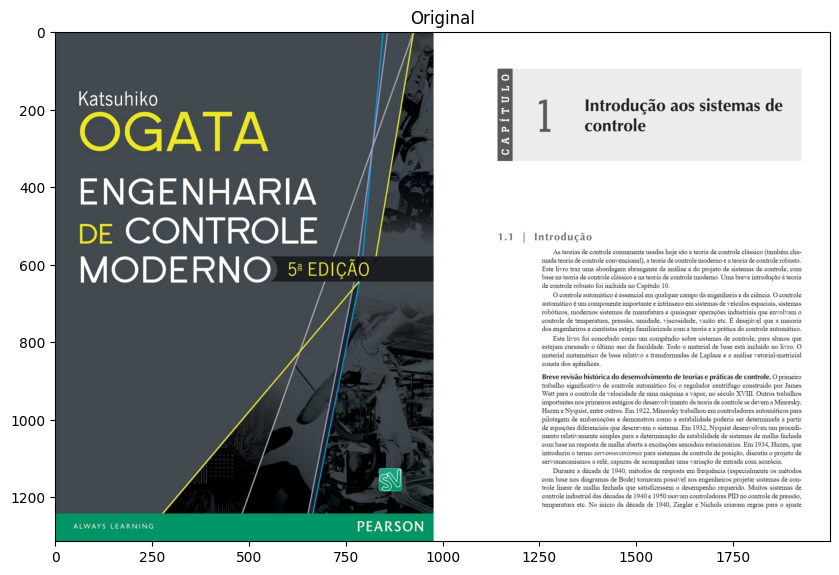

In [34]:
# Abrindo uma imagem (https://pt.m.wikipedia.org/wiki/Ficheiro:Origin_of_Species.jpg)
# On the Origin of Species by Means of Natural Selection, or the Preservation of Favoured Races in the Struggle for Life
# Charles Darwin apresentou pela primeira vez a teoria da evolução por seleção natural, explicando como as espécies se modificam
# ao longo do tempo a partir da variação genética e da sobrevivência dos mais adaptados.

# NO GOOGLE COLAB
#image = cv2.imread('/content/drive/MyDrive/Visao/midias/imagens/Origin_of_Species.jpg')
image = cv2.imread('/content/drive/MyDrive/Visao/midias/imagens/controle.jpg')


# NO MINICONDA (WINDOWS/LINUX)
# image = cv2.imread('./midias/imagens/Origin_of_Species.jpg')

# Formato de cor
# OpenCV utiliza, por padrão, o modelo de cores BGR (Blue, Green, Red), enquanto libs python, como Matplotlib, utilizam o modelo RGB (Red, Green, Blue)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #conversor hehehe

# Mostrando com matplotlib
plt.figure(figsize=(10, 10))
plt.title("Original")
plt.imshow(image)

**Cortando a Imagem** (Cropping)
---


In [36]:
# array numpy (altura, largura, canais)
print(image.shape[:3])

(1314, 2000, 3)


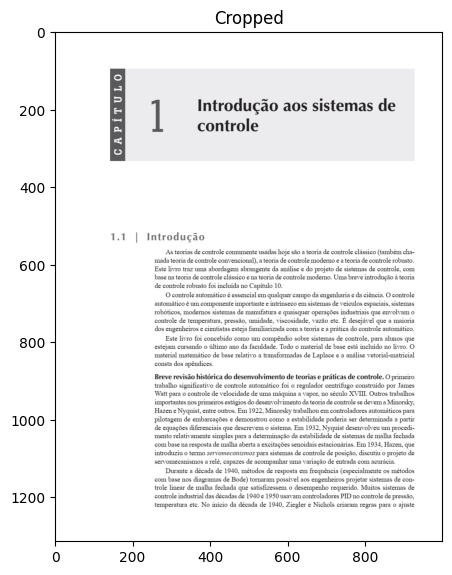

In [37]:
#Obtendo a dimensão da imagem
height, width = image.shape[:2]

# Coordenadas do início (canto superior esquerdo do retângulo)
start_row, start_col = 0, int(width * .5) # coord linha coluna (metade da largura)

# Coordenadas do Final (canto inferior direito do retângulo)
end_row, end_col = height, width

# Slice do python seleciona o retângulo
cropped = image[start_row:end_row , start_col:end_col]

plt.figure(figsize=(5, 10))
plt.title("Cropped")
plt.imshow(cropped)

**Rotacionando**
---


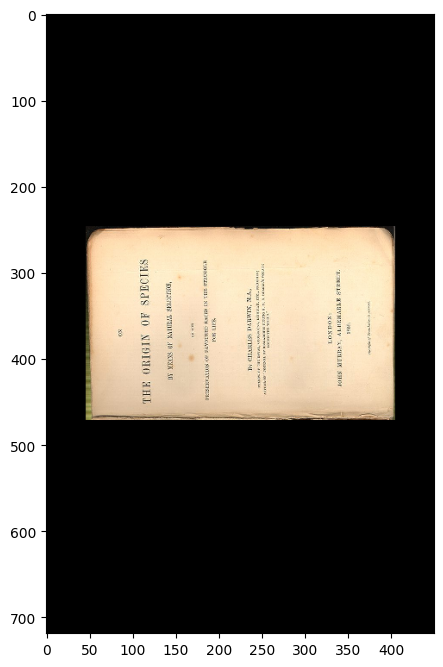

In [23]:
# Obter as dimensões da imagem (altura, largura)
(h, w) = cropped.shape[:2]

# Definir o ponto central da imagem (centro da rotação)
centro = (w // 2, h // 2)

# Definir o ângulo da rotação (ex.: 45 graus)
angulo = 90

# Definir a escala (1.0 mantém o tamanho original)
escala = 0.5

# Obter a matriz de rotação
matriz_rotacao = cv2.getRotationMatrix2D(centro, angulo, escala) #obrigatorio esses parametros

# Aplicar a rotação à imagem
rotated = cv2.warpAffine(cropped, matriz_rotacao, (w, h))

plt.figure(figsize=(5, 10))
plt.imshow(rotated, cmap='gray')

**Mudando tamanho**
---


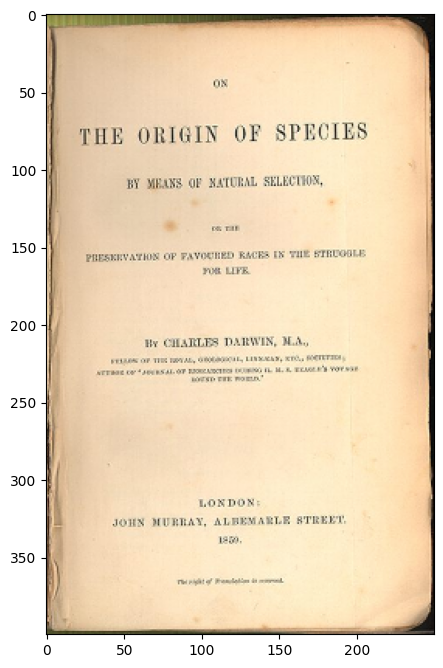

In [24]:
# Definir as novas dimensões (largura, altura)
nova_largura = 250
nova_altura = 400

# Redimensionar a imagem
resized = cv2.resize(cropped, (nova_largura, nova_altura))

plt.figure(figsize=(5, 10))
plt.imshow(resized, cmap='gray')

**Mudando o tamamanho, mantendo as escalas**
---


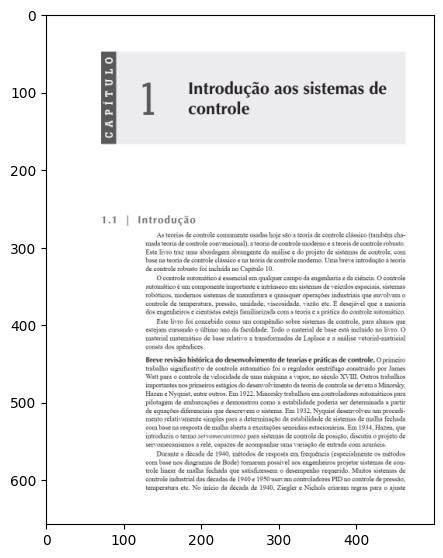

In [38]:
# Definir os fatores de escala (proporcionalmente)
fator_escala_x = 0.5  # 50% da largura original
fator_escala_y = 0.5  # 50% da altura original

# Redimensionar a imagem com base no fator de escala
resized = cv2.resize(cropped, None, fx=fator_escala_x, fy=fator_escala_y)

plt.figure(figsize=(5, 10))
plt.imshow(resized, cmap='gray')

**Transformando em escala de cinza**
---


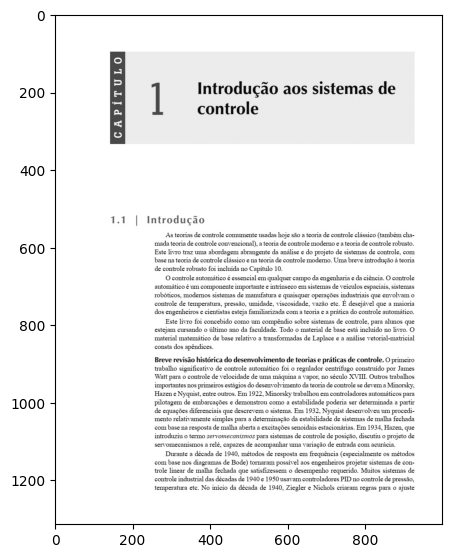

In [39]:
# Converte a imagem para escala de cinza
img_gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(5, 10))
plt.imshow(img_gray, cmap='gray')

**Binarizando**
---

Converte a imagem em preto e branco (**0**: preto, **255**:branco)

Separa (texto, forma, objeto) do resto(fundo)

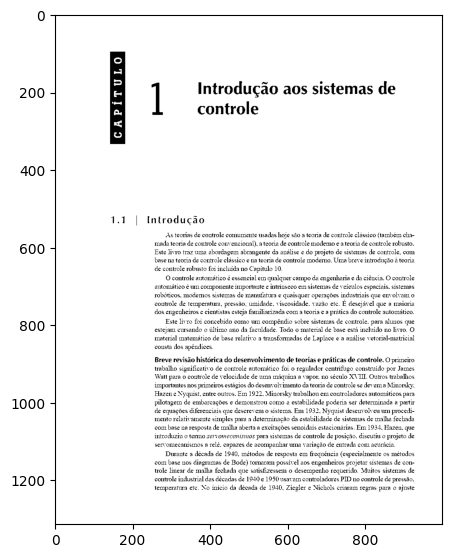

In [40]:
# Valores abaixo do threshold vão a 0 (preto), acima vão a 255 (branco)
th_val = 140 #abaixo disso é preto e acima é branco
max_val = 255
ret,thresh = cv2.threshold(img_gray, th_val, max_val, cv2.THRESH_BINARY)

plt.figure(figsize=(5, 10))
plt.imshow(thresh, cmap='gray')

**Transformações Morfológicas**
---
São **operações baseadas na forma** (morfologia) dos objetos dentro da imagem

Usam um elemento estruturante (um pequeno kernel) para analisar e modificar a vizinhança de cada pixel

**Importância**
*   Remover ruído (pontos brancos ou pretos isolados)
*   Preencher buracos em objetos binários
*   Separar ou unir componentes conectados
*   Melhorar contornos para detecção de bordas
*   Refinar máscaras de segmentação
*   Preparar imagem para OCR, contagem de objetos, etc.


Erosão
---
A erosão é um processo que **reduz as áreas brancas** em uma imagem binária ou **diminui os valores de intensidade** em imagens em escala de cinza, ao eliminar pixels nas bordas de objetos, com base em um elemento estruturante.

O elemento estruturante (também chamado de máscara ou matriz) usado para a operação. É uma matriz 2D de 0s e 1s que define a forma e o tamanho da erosão.

**Benefícios**
*   Remover ruído
*   Desconectar pequenos objetos próximos
*   Destacar contornos de objetos


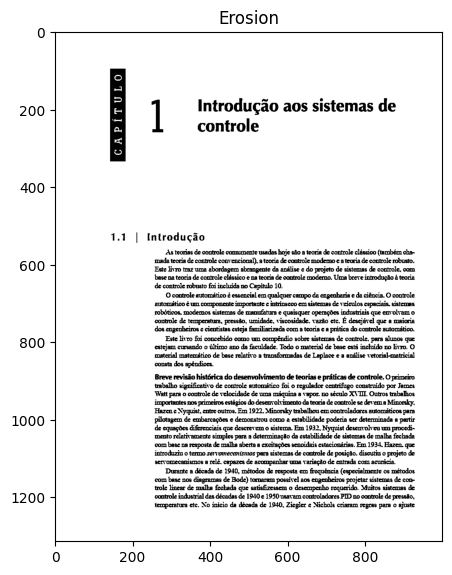

In [41]:
# kernel size (matriz de pixels para a transformação)
kernel = np.ones((2,2), np.uint8)

# Erosão
erosion = cv2.erode(thresh, kernel, iterations = 1)

plt.figure(figsize=(5, 10))
plt.title("Erosion")
plt.imshow(erosion, cmap='gray')

Dilatação
---
A dilatação **expande as áreas brancas** em uma imagem binária ou **aumenta os valores de intensidade** em imagens em escala de cinza, preenchendo lacunas e aumentando o tamanho de objetos brancos com base em um elemento estruturante.

**Aplicações Comuns**
*   Preenchimento de Buracos
*   Conexão de Objetos
*   Aumento de Contornos
*   Remoção de Ruídos Pretos


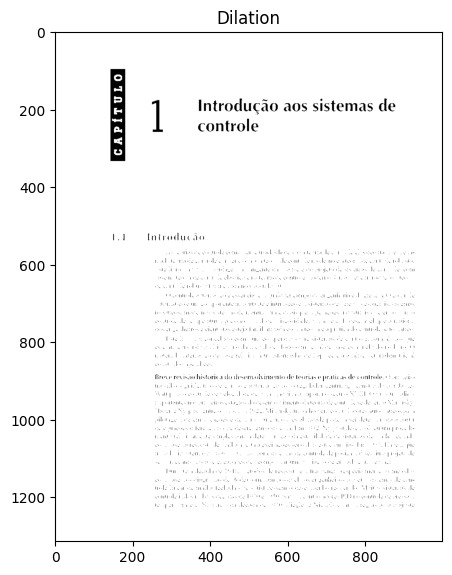

In [42]:
# Dilatação
dilation = cv2.dilate(thresh, kernel, iterations = 1)

plt.figure(figsize=(5, 10))
plt.title("Dilation")
plt.imshow(dilation, cmap='gray')

Opening / Closing
---
É comum usar uma operação de **Dilatação** e, posteriormente, **Erosão** para melhorar qualidade da imagem.

* Essa operação se chama ***Closing*** (cv2.MORPH_CLOSE).

* Seu inverso se chama ***Opening*** (cv2.MORPH_OPEN).


**Closing**

---



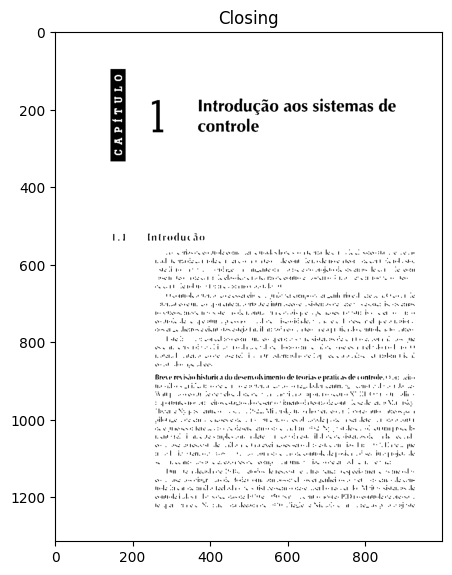

In [43]:
# Ex. Closing = dilation + erodion
kernel = np.ones((2,2), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
plt.figure(figsize=(5, 10))
plt.title("Closing")
plt.imshow(closing, cmap='gray')

**Opening**

---


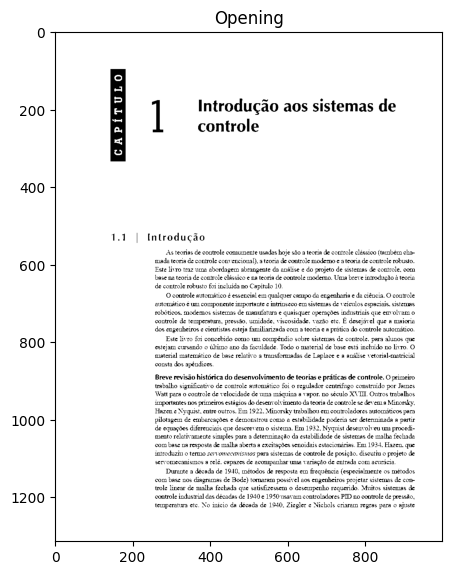

In [44]:
# Ex. Opening = erodion + dilation
kernel = np.ones((2,2), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
plt.figure(figsize=(5, 10))
plt.title("Opening")
plt.imshow(opening, cmap='gray')

**Optical Character Recognition (OCR) with Tesseract**
---

A biblioteca **Tesseract** é uma ferramenta de OCR (Optical Character Recognition, ou Reconhecimento Óptico de Caracteres) de código aberto que permite extrair texto de imagens.

Desenvolvida inicialmente pela Hewlett-Packard, foi posteriormente aprimorada pelo Google, que ainda mantém seu desenvolvimento.

Link: https://github.com/tesseract-ocr/tesseract

In [32]:
## INSTALAÇÃO DO TESSERACT NO GOOGLE COLAB ##

# Instala o Tesseract OCR no Linux do Colab
!apt-get install tesseract-ocr -y

# Instala o pytesseract (interface Python com o programa Tesseract)
!pip install pytesseract

## INSTALAÇÃO DO TESSERACT NO WINDOWS ##
# Instalar o Tesseract-OCR-w64-5.5.0.20241111.exe
# Utilizar o diretório C:\Visao\Tesseract\

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [45]:
## NO GOOGLE COLAB ##

# Importa a biblioteca
import pytesseract
print('Tesseract ', pytesseract.get_tesseract_version())

# Extrai texto
text = pytesseract.image_to_string(cropped)
print(text)

## NO WINDOWS ##

# Importa a biblioteca
# import pytesseract

# Caminho completo do executável tesseract
# pytesseract.pytesseract.tesseract_cmd = r'C:\Visao\Tesseract\tesseract.exe'

# Versão do Tesseract
# print('Tesseract ', pytesseract.get_tesseract_version())


Tesseract  4.1.1
fo}
4
==)
a
Aa
x
o

 

1.1

Introdugao aos sistemas de
controle

Introducgao

As teorias de controle comumente usadas hoje sao a teoria de controle classico (também cha-
mada teoria de controle convencional), a teoria de controle moderno ¢ a teoria de controle robusto.
Este livro traz uma abordagem abrangente da andlise e do projeto de sistemas de controle, com
base na teoria de controle classico e na teoria de controle modemo. Uma breve introdugio a teoria
de controle robusto foi incluida no Capitulo 10.

O controle automatico é essencial em qualquer campo da engenharia e da ciéncia. O controle
automatico € um componente importante e intrinseco em sistemas de veiculos espaciais, sistemas
robéticos, modemos sistemas de manufatura e quaisquer operagdes industriais que envolvam o
controle de temperatura, pressio, umidade, viscosidade, vazio ete. E desejével que a maioria
dos engenheiros e cientistas esteja familiarizada com a teoria ¢ a pratica do controle automatico.

E

**Detecção de Objetos**
---
*   Uma única imagem pode possuir vários objetos de interesse
*   Detecção de Objetos consiste em localizar diferentes objetos de diferentes classes marcando a posição com um bounding-box




Face Detection
---
*   O OpenCV fornece modelos pré-treinados para detectar diferentes objetos em uma imagem, como os olhos de uma pessoa, sorriso, parte superior do corpo e até a placa de um veículo
*   Existem diferentes classificadores integrados ao OpenCV no repositório GitHub da biblioteca
*   Ver mais em https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html
